### Dataset - Normalized with Z-Score method / Without Redshift

#### Random Forest algorithm 

In [1]:
import pandas as pd # for Dataframe manupulation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization
import numpy as np # for arrays manipulation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 
# to import evaluation metrices

In [2]:
df_zc_wr = pd.read_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_zc_wr.csv")

In [3]:
df_zc_wr

,alpha,delta,u,g,r,i,z,class
0,-0.074487,1.289303,0.026105,0.028179,0.278991,0.019125,0.000182,0
1,-0.698904,0.750608,-0.045018,-0.011422,0.289704,0.731347,0.051148,0
2,-1.794078,-0.327996,0.011324,0.026022,0.588107,1.068690,0.042780,0
3,-0.067306,-0.235023,-0.027930,-0.040495,-1.226457,-1.264591,-0.051649,0
4,0.376113,-1.094194,-0.046110,-0.061310,-1.633565,-1.662025,-0.067928,0
...,...,...,...,...,...,...,...,...
56878,0.285100,0.747929,0.003668,0.016591,0.619789,0.824884,0.044223,2
56879,-1.680821,-1.196559,0.043405,0.010067,-0.219655,-0.664877,-0.033554,2
56880,0.249313,0.582905,-0.052432,-0.048213,-1.017237,-0.879015,-0.028594,2
56881,-1.753353,0.525410,-0.089405,-0.091785,-2.184998,-1.989771,-0.076964,2


In [4]:
x = df_zc_wr.drop("class",axis='columns')
x.head()

,alpha,delta,u,g,r,i,z
0,-0.074487,1.289303,0.026105,0.028179,0.278991,0.019125,0.000182
1,-0.698904,0.750608,-0.045018,-0.011422,0.289704,0.731347,0.051148
2,-1.794078,-0.327996,0.011324,0.026022,0.588107,1.068690,0.042780
3,-0.067306,-0.235023,-0.027930,-0.040495,-1.226457,-1.264591,-0.051649
4,0.376113,-1.094194,-0.046110,-0.061310,-1.633565,-1.662025,-0.067928


In [5]:
y = df_zc_wr["class"]
y

0        0
1        0
2        0
3        0
4        0
        ..
56878    2
56879    2
56880    2
56881    2
56882    2
Name: class, Length: 56883, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42, stratify=y)

In [7]:
from sklearn.ensemble import RandomForestClassifier

# initializing model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = model_rf.predict(x_test)


In [9]:
from sklearn.metrics import confusion_matrix

# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1711,   76,  109],
       [ 132, 1622,  142],
       [ 178,  229, 1490]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

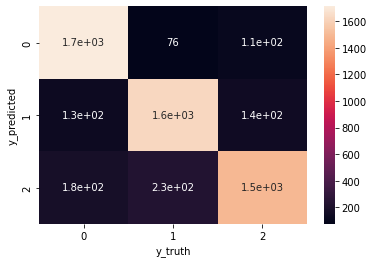

In [10]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [11]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8477764106169802
Precision: 0.8480544856333001
Recall: 0.8477873680183455
F1 Score: 0.8471024759206487


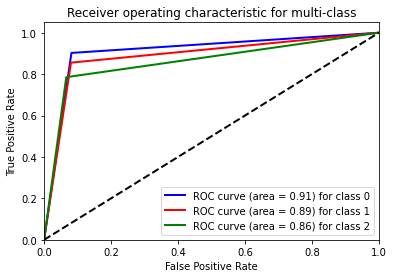

In [12]:
# Plot ROC curve for each class separately

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

#### Support Vector Machine (SVM) algorithm

In [13]:
from sklearn.svm import SVC #importing SVC class

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# training the SVM model
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(x_train, y_train)


SVC(C=1, kernel='linear')

In [14]:
y_pred = model_svm.predict(x_test)

In [15]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1277,  171,  448],
       [ 115, 1602,  179],
       [ 451,  427, 1019]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

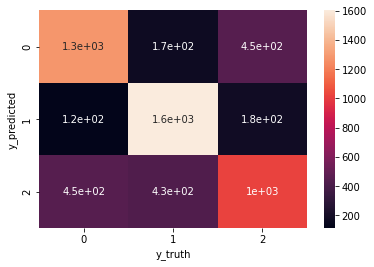

In [16]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [17]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6851819300404289
Precision: 0.6800501304220475
Recall: 0.6852079528932721
F1 Score: 0.6801718811142674


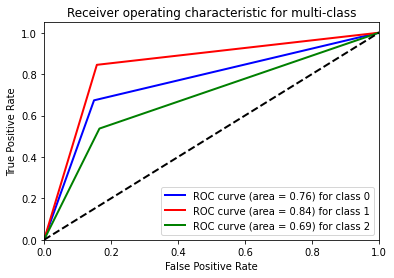

In [18]:
# Plot ROC curve for each class separately

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

#### Extremely Randomized Trees (ERT) algorithm

In [19]:
from sklearn.ensemble import ExtraTreesClassifier #importing extra trees classifier

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the ERT model and fit it to the training data
model_ert = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
model_ert.fit(x_train, y_train)

ExtraTreesClassifier()

In [20]:
y_pred = model_ert.predict(x_test)

In [21]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1719,   77,  100],
       [ 137, 1624,  135],
       [ 203,  262, 1432]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

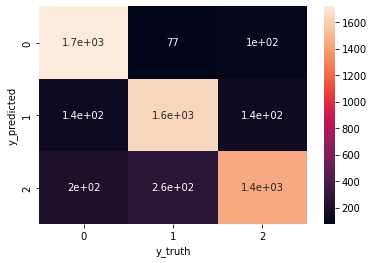

In [22]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [23]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8393390754086835
Precision: 0.8404015454310203
Recall: 0.8393539247327374
F1 Score: 0.838179896517364


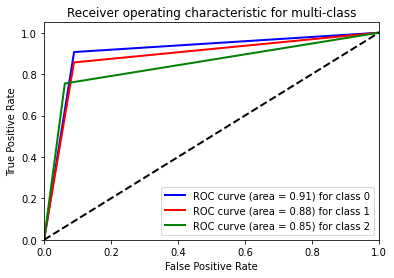

In [24]:
# plotting ROC curve for each class separately

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

####  Decision Tree algorithm

In [25]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree module

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the decision tree model and fit it to the training data
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = model_dt.predict(x_test)

In [27]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1501,  170,  225],
       [ 191, 1440,  265],
       [ 223,  254, 1420]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

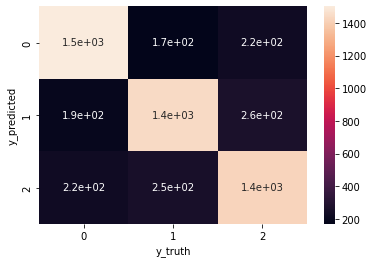

In [28]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [29]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7665670592371243
Precision: 0.7665998988890883
Recall: 0.7665702267330087
F1 Score: 0.766557142191194


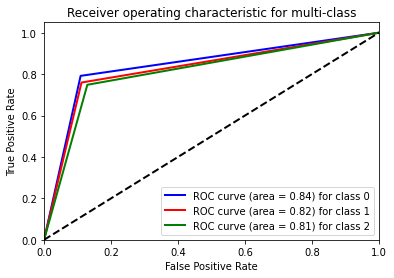

In [30]:
# plotting ROC curve for each class separately

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

#### KNN algorithm

In [31]:
from sklearn.neighbors import KNeighborsClassifier # importing KNN module

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the knn model and fit it to the training data
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = model_knn.predict(x_test)

In [33]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1649,  100,  147],
       [ 186, 1460,  250],
       [ 344,  485, 1068]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

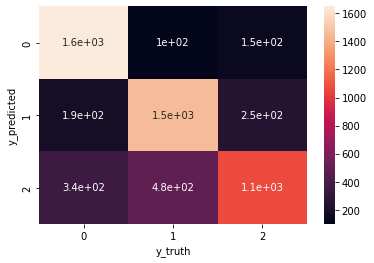

In [34]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [35]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7342239409386535
Precision: 0.7332386097969706
Recall: 0.7342540446200122
F1 Score: 0.7285299870442709


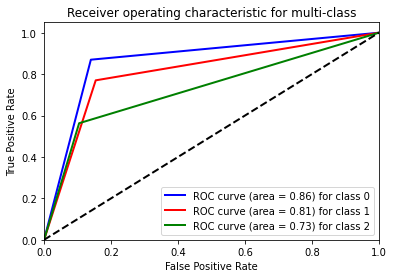

In [36]:
# plotting ROC curve for each class separately

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()